In [1]:
"""
3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with isotropic and anisotropic susceptibilities)
"""
# insert the figures in the notebook
%matplotlib inline

import numpy as np
from fatiando import utils, gridder
import triaxial_ellipsoid
from mesher import TriaxialEllipsoid

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [2]:
# The regional field
F, inc, dec = 23500., 30, -15

bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a model formed by two ellipsoids
# The first ellipsoid does not have remanent magnetization and
# has an anisotropic susceptibility (k1 = 0.4, k2 = 0.3, k3 = 0.15). 
# The second has a remanent magnetization of 2 A/m
# and an isotropic susceptibility of 0.01
model = [TriaxialEllipsoid(-2500., -2500., 1000., 900., 600., 300., 45., -10., 34.,
                           {'susceptibility tensor': [0.4, 0.3, 0.15, 0., 13., 64.]}),
         TriaxialEllipsoid(2500., 2500., 1000., 950., 640., 600., 45., 62., -7.,
                           {'remanent magnetization': [2, 90., 4.],
                            'susceptibility tensor': [0.01, 0.01, 0.01, 34., 82., 18.]})]

# Create a regular grid at 0m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z = 0)

# Calculate the total-field anomaly
tf = triaxial_ellipsoid.tf(xp, yp, zp, model, F, inc, dec)

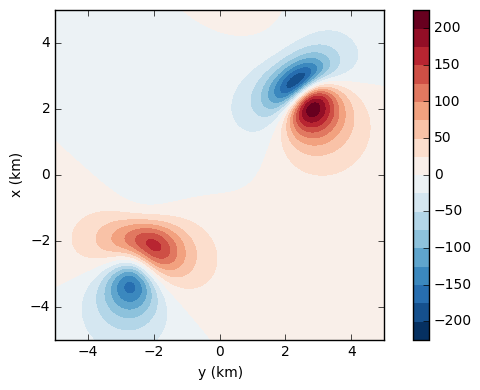

In [3]:
# Plot the results
plt.close('all')
plt.figure()
plt.axis('scaled')

ranges = np.max(np.abs([np.min(tf), np.max(tf)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()

plt.tight_layout()

plt.show()